<a href="https://colab.research.google.com/github/mamun216/ML_Models/blob/master/ML_bootcamp_assignment_1_on_travel_insurance_claim_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn import preprocessing

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [3]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


# Missing values columns

In [4]:
insurance_data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

# Check the duration column skewed or not

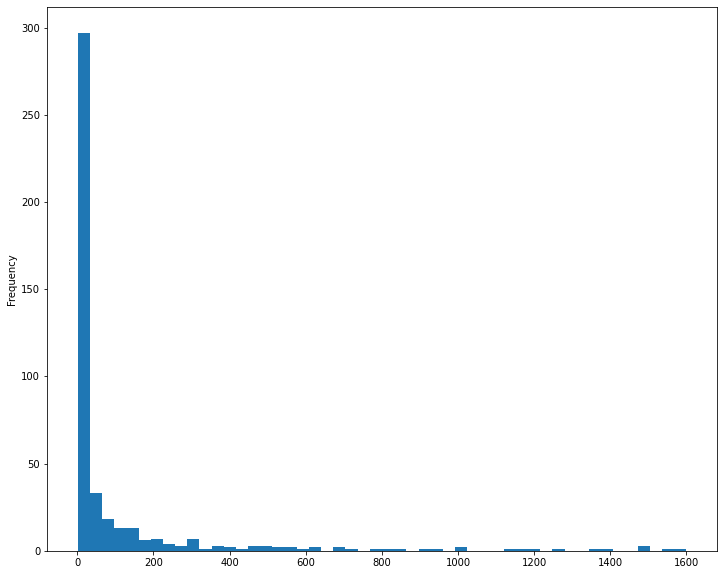

In [29]:
insurance_data['Duration'].value_counts().plot(kind='hist', bins = 50, figsize = (12,10));

# Check two columns have negative values

In [6]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [7]:
insurance_data[insurance_data['Duration'] <=0].value_counts().sum()

34

In [8]:
insurance_data[insurance_data['Net Sales'] <=0].value_counts().sum()

316

# Among all customers who have claimed for insurance, most of them are male

In [9]:

insurance_data.groupby(by='Gender')['Claim'].value_counts()

Gender  Claim
F       0        6507
        1         255
M       0        6909
        1         228
Name: Claim, dtype: int64

# Fill the column gender missing values with 'Not Specified'

In [10]:

insurance_data.fillna(value = 'Not Specified', inplace = True)


# Drop 'Distribution Channel', 'Destination' and 'Agency Type'.

In [11]:

insurance_data.drop(['Distribution Channel', 'Destination', 'Agency Type'], axis = 1, inplace = True)

# Perform one hot encoding for 'Agency','Gender','Product Name' using sklearn

In [12]:

from sklearn.preprocessing import OneHotEncoder
x = [[0, "Agency"], [3, "Product Name"], [8, "Gender"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]


In [13]:
cat_cols = ['Agency', 'Product Name', 'Gender']
insurance_data = pd.get_dummies(insurance_data, columns = cat_cols)
insurance_data.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Seperate dependent and independent features

In [14]:

X = insurance_data.drop(['Claim'], axis=1)
Y = insurance_data.Claim

# Split the data into training and test set with test_size = 0.3 and random_state = 101


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# As the data has imbalanced classes, use smote to equalize the classes on training set splitted in operation 5. 

Use random_state = 25 and sampling_strategy = 1.0 while initializing smote.

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 25, sampling_strategy = 1.0)
X_train, Y_train = smote.fit_sample(X_train, Y_train)
X_test, Y_test = smote.fit_sample(X_test, Y_test)

# Build a Logistic Regression model


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression()

logistic_model = model.fit(X_train, Y_train)

predictions_LM = logistic_model.predict(X_test)

print('Accuracy score in  Logistic Regression')

print(accuracy_score(Y_test,predictions_LM))
print('f1_score in  Logistic Regression')
print(f1_score(Y_test,predictions_LM))

Accuracy score in  Logistic Regression
0.7662605895120073
f1_score in  Logistic Regression
0.7510718413302017


In [18]:
pred = logistic_model.predict(X_train)
print(accuracy_score(Y_train, pred))
print(f1_score(Y_train, pred))

0.7657128257537047
0.7509306747191998


# Decision tree classifier


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state= 1)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [20]:
pred_dtree = dtree.predict(X_test)
print(f1_score(Y_test,pred_dtree))
print(accuracy_score(Y_test, pred_dtree))

0.8572991132466111
0.8721207029335574


In [21]:
# on training dataset
pred_dtree = dtree.predict(X_train)
print(f1_score(Y_train,pred_dtree))
print(accuracy_score(Y_train, pred_dtree))

0.998675855427488
0.9986774474736241


# Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [23]:
pred_rfc = rfc.predict(X_test)
print(f1_score(Y_test, pred_rfc))
print(accuracy_score(Y_test, pred_rfc))

0.880367979591048
0.8916544143387244


# Grid search cv for random forest classifier


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 1)


In [49]:
param_gridsearch1 = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]}

In [50]:
gs = GridSearchCV(rfc, param_grid=param_gridsearch1, cv = 3, n_jobs = -1, verbose = 2)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [51]:
pred = gs.predict(X_test)
f1_score(Y_test, pred)

0.8894794790994343

In [52]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

# Grid search cv for decision tree classifier


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state= 1)


In [42]:
param_gridsearch2 = {'max_leaf_nodes': [5, 10, 15, 20],
'min_samples_split': [4, 6, 8, 10]}

In [43]:
gs2 = GridSearchCV(dtree, param_grid=param_gridsearch2, cv = 3, n_jobs = -1, verbose = 2)
gs2.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_split': [4, 6, 8, 10]},
       

In [45]:
pred1 = gs2.predict(X_test)
f1_score(Y_test, pred1)

0.8143026471750295

In [55]:
gs2.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 4}

# Perform feature selection using RFE

*Initialize random forest model with random_state = 1

*Initialize RFE with step = 1

*Fit the data to RFE

*Build the random forest model with: random_state=1 using the selected features by rfe

In [54]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library
# Recursive Feature Elimination (RFE) = As the name suggests, Recursive Feature Elimination works by recursively(repeatedly) removing features
# and building a model on the features that remain.
rfe = RFE(random_state = 1, estimator= rfc , step = 1) 
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, Y_train)

print("Num Features: %d" % fit.n_feature)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 24
Selected Features: [ True  True  True  True False False  True False False False  True  True
 False  True False  True False False False False  True  True False False
  True False False False  True  True  True False False  True False False
  True  True  True False False False  True False False  True  True  True
  True]
Feature Ranking: [ 1  1  1  1 22 13  1 25 16 24  1  1  6  1  9  1 17  4  5 14  1  1 19 11
  1  3 20 12  1  1  1 23  7  1 18 15  1  1  1  2  8 21  1 10 26  1  1  1
  1]


In [56]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = rfc.fit(X_train_rfe, Y_train)

In [57]:

# making predictions and evaluating the model
Y_pred_rfe = rfc.predict(X_test_rfe)

rfe_ac = accuracy_score(Y_test, Y_pred_rfe)
rfe_fscore = f1_score(Y_test ,Y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.8917944409437794
RFE Model F1 Score: 0.8805318285471341
